# K-means
# Hierarchical Clustering
# Affinity Propagation

In [36]:
# Import the Necessary Dependencies

# Data Manipulation
import re ## regular expression operator
import numpy as np
import pandas as pd
import string 


# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Methods and stopwords text processing
import nltk ## natural language toolkit
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer


# Machine Learning Libraries
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AffinityPropagation
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df_raw = pd.read_csv('twitter_data.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

#Exploratory Data Analysis
df_raw.head()

# Removing the unnecessary columns.
df_raw = df_raw[['target','text']]

# Storing data in lists.
text, target = list(df_raw['text']), list(df_raw['target'])

In [38]:
print('length of data is', len(df_raw))

length of data is 1600000


In [39]:
# Create subgroups based on the target column
subgroups = df_raw['target'].astype(str)  # Convert the 'target' column to a string to ensure correct stratification

# Specify the number of tweets you want to include in your final dataset for each subgroup
#n_samples = 20000  # Replace with the desired number of tweets in each subgroup
n_samples = 1000  # Replace with the desired number of tweets in each subgroup


# Use train_test_split to do stratified sampling
target0_df, _ = train_test_split(df_raw[subgroups == '0'], stratify=subgroups[subgroups == '0'], train_size=n_samples/len(df_raw[subgroups == '0']), random_state=42)
target4_df, _ = train_test_split(df_raw[subgroups == '4'], stratify=subgroups[subgroups == '4'], train_size=n_samples/len(df_raw[subgroups == '4']), random_state=42)

# Combine the two subgroups into a single dataframe
df = pd.concat([target0_df, target4_df], ignore_index=True)

# Save the sampled dataset
df.to_csv('sampled_twitter_data1.csv', index=False)

In [40]:
print('The new length of data is', len(df))

The new length of data is 2000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  2000 non-null   int64 
 1   text    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [42]:
df.dtypes

target     int64
text      object
dtype: object

In [43]:
#Checking for null values
np.sum(df.isnull().any(axis=1))

0

In [44]:
#Rows and columns in the dataset
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   2
Count of rows in the data is:   2000


In [45]:
#Check unique target values
df['target'].unique()

array([0, 4], dtype=int64)

In [46]:
#Check the number of target values
df['target'].nunique()

2

In [47]:
df['text'].tail()

1995    @ThomasFritts I'm so jealous. Mountains are my...
1996                       home. just a few more minutes 
1997    im getting the voyager for cheap  $50 baby! im...
1998    @Nonicam that classic help desk response-turn ...
1999    is chatting on facey with @JuliaBier and Matt ...
Name: text, dtype: object

In [48]:
# Convert all text to lowercase
df['text'] = df['text'].str.lower()
df['text'].tail()

1995    @thomasfritts i'm so jealous. mountains are my...
1996                       home. just a few more minutes 
1997    im getting the voyager for cheap  $50 baby! im...
1998    @nonicam that classic help desk response-turn ...
1999    is chatting on facey with @juliabier and matt ...
Name: text, dtype: object

In [49]:
#Cleaning and removing punctuations

english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['text']= df['text'].apply(lambda x: cleaning_punctuations(x))
df['text'].tail()

1995    thomasfritts im so jealous mountains are my fa...
1996                        home just a few more minutes 
1997    im getting the voyager for cheap  50 baby im s...
1998    nonicam that classic help desk responseturn it...
1999    is chatting on facey with juliabier and matt a...
Name: text, dtype: object

In [50]:
#Cleaning and removing repeating characters

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['text'] = df['text'].apply(lambda x: cleaning_repeating_char(x))
df['text'].tail()

1995    thomasfritts im so jealous mountains are my fa...
1996                        home just a few more minutes 
1997    im getting the voyager for cheap  50 baby im s...
1998    nonicam that classic help desk responseturn it...
1999    is chatting on facey with juliabier and matt a...
Name: text, dtype: object

In [51]:
#Cleaning and removing URLs

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['text'] = df['text'].apply(lambda x: cleaning_URLs(x))
df['text'].tail()

1995    thomasfritts im so jealous mountains are my fa...
1996                        home just a few more minutes 
1997    im getting the voyager for cheap  50 baby im s...
1998    nonicam that classic help desk responseturn it...
1999    is chatting on facey with juliabier and matt a...
Name: text, dtype: object

In [52]:
#Cleaning and removing numeric numbers

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['text'] = df['text'].apply(lambda x: cleaning_numbers(x))
df['text'].tail()

1995    thomasfritts im so jealous mountains are my fa...
1996                        home just a few more minutes 
1997    im getting the voyager for cheap   baby im so ...
1998    nonicam that classic help desk responseturn it...
1999    is chatting on facey with juliabier and matt a...
Name: text, dtype: object

In [53]:
# Removing # and @ characters from tweets and other symbols

def cleaning_characters(data):
    return re.sub(r'\@\w+|\#|\'|\"|\´|\`|\,','', data)
df['text'] = df['text'].apply(lambda x: cleaning_characters(x))
df['text'].tail()

1995    thomasfritts im so jealous mountains are my fa...
1996                        home just a few more minutes 
1997    im getting the voyager for cheap   baby im so ...
1998    nonicam that classic help desk responseturn it...
1999    is chatting on facey with juliabier and matt a...
Name: text, dtype: object

In [54]:
#Defining set containing all stopwords in English.

nltk.download ('stopwords')
stop_words = set(stopwords.words( 'english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
#Cleaning and removing the above stop words list from the tweet text

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))
df['text'].tail()

1995    thomasfritts im jealous mountains favorite tol...
1996                                         home minutes
1997             im getting voyager cheap baby im excited
1998    nonicam classic help desk responseturn turn gl...
1999                  chatting facey juliabier matt maine
Name: text, dtype: object

In [56]:
# Count the words used per user

def word_count(sentence):
    return len(sentence.split())
    
df['word count'] = df['text'].apply(word_count)
df.tail()

,target,text,word count
1995,4,thomasfritts im jealous mountains favorite tol...,8
1996,4,home minutes,2
1997,4,im getting voyager cheap baby im excited,7
1998,4,nonicam classic help desk responseturn turn gl...,8
1999,4,chatting facey juliabier matt maine,5


In [57]:
# Stemming process

st = nltk.PorterStemmer()
def stemming_process(data):
    text = [st.stem(word) for word in data]
    return data
df['text']= df['text'].apply(lambda x: stemming_process(x))
df['text'].tail()

1995    thomasfritts im jealous mountains favorite tol...
1996                                         home minutes
1997             im getting voyager cheap baby im excited
1998    nonicam classic help desk responseturn turn gl...
1999                  chatting facey juliabier matt maine
Name: text, dtype: object

In [58]:
# Lemmatizer Proccess
from nltk.stem import WordNetLemmatizer
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['text'] = df['text'].apply(lambda x: lemmatizer_on_text(x))
df['text'].tail()

1995    thomasfritts im jealous mountains favorite tol...
1996                                         home minutes
1997             im getting voyager cheap baby im excited
1998    nonicam classic help desk responseturn turn gl...
1999                  chatting facey juliabier matt maine
Name: text, dtype: object

In [59]:
# Separating positive and negative tweets

data_pos = df[df['target'] == 4]
data_neg = df[df['target'] == 0]
df = pd.concat([data_neg, data_pos])
data_neg.tail()

# Save the sampled dataset
df.to_csv('sampled_twitter_data.csv', index=False)

In [60]:
data_pos.tail()

,target,text,word count
1995,4,thomasfritts im jealous mountains favorite tol...,8
1996,4,home minutes,2
1997,4,im getting voyager cheap baby im excited,7
1998,4,nonicam classic help desk responseturn turn gl...,8
1999,4,chatting facey juliabier matt maine,5


In [61]:
# Doing tokenization of Tweet Text

tokenizer = RegexpTokenizer(r'\w+')
df_tk = df['text'].apply(tokenizer.tokenize)
df_tk.tail()

1995    [thomasfritts, im, jealous, mountains, favorit...
1996                                      [home, minutes]
1997     [im, getting, voyager, cheap, baby, im, excited]
1998    [nonicam, classic, help, desk, responseturn, t...
1999            [chatting, facey, juliabier, matt, maine]
Name: text, dtype: object

In [62]:
# Separate the date into train and test subset

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'],
                                                    test_size = 0.05, random_state = 0)
print(f'Data Split done.')

# X = df.drop('target', axis=1)  # Predictor feature columns
# y = df['target']   # Predicted class (1=True, 0=False)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0) 
# 0.05 is the proportion of the data to allocate to the test set 
#the random seed used to split the data. This ensures that the same random split is used every time the code is run.

X_train.tail()
X_train_all = df['text']

X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

Data Split done.


In [71]:
print(('X_train shape =', X_train.shape), ('y_train shape =', y_train.shape), ('X_test shape =', X_test.shape), ('y_test shape =', y_test.shape))

('X_train shape =', (1900,)) ('y_train shape =', (1900,)) ('X_test shape =', (100,)) ('y_test shape =', (100,))


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# # vectorize the text data
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vz = vectorizer.fit_transform(X_train_all)
#vectorizer.fit(X_train)
print('Vectorizer fitted.')
print('No. of feature_words: ', len(vectorizer.get_feature_names_out()))

# # transform the text data into a sparse matrix
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# save it into sparse matrix format
# save_npz('X_train.npz', X_train_vec) #model do save sparse matrix
# save_npz('X_test.npz', X_test_vec)

Vectorizer fitted.
No. of feature_words:  18480


# K-means

K-means clustering is a popular unsupervised machine learning algorithm that is commonly used for clustering data. In the context of sentiment analysis, K-means clustering can be used to group similar tweets based on the sentiment expressed in the text. The algorithm works by randomly selecting k centroids and then iteratively updating the centroids until convergence. Each data point is then assigned to the nearest centroid based on the Euclidean distance metric. K-means clustering is relatively fast and easy to implement, but it requires the number of clusters to be specified beforehand and can be sensitive to initial centroid placement.

Is used to group similar data points into clusters based on their distance from each other. The goal is to minimize the SSE (sum of squared errors) within each cluster, which measures how far each data point is from its cluster centroid.

The output of the K-means algorithm is a set of cluster assignments for each data point, as well as the coordinates of the cluster centroids. The sorted_centroids variable contains the indices of the top features for each cluster, which can help to interpret what each cluster represents in terms of the original data.

The sse list stores the SSE values for each number of clusters tested. A good way to interpret these results is to plot the SSE values against the number of clusters, as done in the code provided. The resulting plot can help determine the optimal number of clusters for the data. Generally, the SSE value will decrease as the number of clusters increases, but there will be a point at which the SSE starts to level off or even increase again. This point represents the optimal number of clusters, as adding more clusters beyond this point does not significantly improve clustering performance.

Overall, the results of the K-means algorithm can be interpreted as a way of grouping similar data points together, based on the top features that are most characteristic of each group. This can provide insights into the underlying structure of the data, and can be used for various applications such as image recognition, customer segmentation, and anomaly detection.

The code implements the K-means clustering algorithm using the MiniBatchKMeans implementation from the sklearn.cluster module. It also includes code to visualize the clustering output using the SSE (sum of squared errors) measure.


In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# # vectorize the text data
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vz = vectorizer.fit_transform(X_train_all)
#vectorizer.fit(X_train)
print('Vectorizer fitted.')
print('No. of feature_words: ', len(vectorizer.get_feature_names_out()))

# # transform the text data into a sparse matrix
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# save it into sparse matrix format
# save_npz('X_train.npz', X_train_vec) #model do save sparse matrix
# save_npz('X_test.npz', X_test_vec)

Vectorizer fitted.
No. of feature_words:  18480


In [87]:
from sklearn.cluster import MiniBatchKMeans  
# This line imports the MiniBatchKMeans implementation from the sklearn.cluster module. 
# This implementation is a variant of the K-means algorithm that uses mini-batches of the input data for efficiency.

#num_clusters = 10
sse = []
# These lines set up a list called sse to store the SSE values for each number of clusters tested.

for num_clusters in range(1,13):
  # This line starts a loop that will run the K-means algorithm for a range of different numbers of clusters, from 1 to 12.

  kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                          init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
  # This line creates a new MiniBatchKMeans object, setting the number of clusters (n_clusters) to the current value of num_clusters, 
  # and using the 'k-means++' initialization method. The init_size and batch_size parameters control the size of the mini-batches used, 
  # while verbose controls whether progress updates are printed. 
  # The max_iter parameter controls the maximum number of iterations to run the algorithm for.
  
  kmeans = kmeans_model.fit(vz)
# This line fits the K-means model to the input data vz, storing the resulting model in the kmeans variable.

  kmeans_clusters = kmeans.predict(vz)
# This line predicts the cluster assignments for each data point in vz, based on the fitted K-means model. 
# The resulting cluster assignments are stored in the kmeans_clusters variable.

  kmeans_distances = kmeans.transform(vz)
# This line computes the distances between each data point in vz and each cluster centroid, based on the fitted K-means model. 
# The resulting distances are stored in the kmeans_distances variable.

  sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
# This line sorts the cluster centroids in descending order of their distances to the data points in vz. The resulting sorted centroids 
# are stored in the sorted_centroids variable.

  terms = vectorizer.get_feature_names_out()
# This line retrieves the feature names used in the input data vz, assuming it was created using a vectorizer object. 
# The resulting feature names are stored in the terms variable.

  sse.append(kmeans.inertia_)
# This line calculates the SSE for the current number of clusters (num_clusters) using the inertia_ attribute of the kmeans object. 
# The resulting SSE value is added to the sse list.

  for i in range(num_clusters):
      print("Cluster %d:" % i)
      for j in sorted_centroids[i, :20]:
          print(' %s' % terms[j])
      print('-'*80)
# This code block prints out the top 20 features for each cluster, 
# for the current number of clusters (num_clusters). 
# It does this by looping through each cluster, 
# printing out the cluster number (i) and the top 20 feature names      

Cluster 0:
 im
 good
 like
 go
 day
 get
 cant
 work
 lol
 dont
 going
 got
 today
 time
 really
 thanks
 well
 still
 miss
 know
--------------------------------------------------------------------------------
Cluster 0:
 got
 got back
 back
 got home
 home
 school
 lol
 bit
 really sad
 work
 got twitter
 phone
 finally
 got tounge
 tounge pierced
 tounge
 pierced
 today
 sad
 vcover
--------------------------------------------------------------------------------
Cluster 1:
 im
 good
 like
 go
 day
 cant
 work
 get
 going
 lol
 dont
 time
 know
 one
 thanks
 really
 miss
 well
 still
 today
--------------------------------------------------------------------------------
Cluster 0:
 im
 go
 like
 work
 day
 got
 lol
 get
 cant
 dont
 going
 really
 today
 one
 well
 know
 thanks
 time
 back
 miss
--------------------------------------------------------------------------------
Cluster 1:
 good
 hey
 good morning
 morning
 good news
 feeling
 hope
 feeling good
 xoxo
 news
 dont
 love
 

This code is performing clustering using Mini-Batch K-Means algorithm from scikit-learn's sklearn.cluster module. The algorithm is applied to the input data vz for varying number of clusters (num_clusters) ranging from 1 to 12. For each value of num_clusters, the algorithm initializes the K-Means centroids using k-means++ algorithm, runs the algorithm for at most 1000 iterations, and stores the resulting clusters and the corresponding distances to the centroids.

The code then prints the top 20 terms (words) in each cluster, based on their frequency within that cluster. This gives an idea of the words that are most representative of each cluster.

The sse list is also created to store the sum of squared distances of samples to their closest cluster center for each value of num_clusters. This can be used to identify the elbow point in the SSE plot to determine the optimal number of clusters for the given dataset.

To interpret the output, you can look at the top 20 terms in each cluster and try to identify any patterns or common themes among the words. For example, in the first two clusters, there are some common words such as "good", "day", "work", "get", "like", "go", etc. These words may indicate a general positive sentiment or mood. In the other clusters, there are words like "morning", "bed", "sleep", "night", "tired", etc. which may indicate a focus on sleep and rest.

Overall, the interpretation of the output depends on the specific context and nature of the input data, as well as the number of clusters chosen. It's important to keep in mind that clustering is an unsupervised learning method, so the interpretation may not always be straightforward or intuitive.

- Visualizing the output Kmeans based on SSE measure

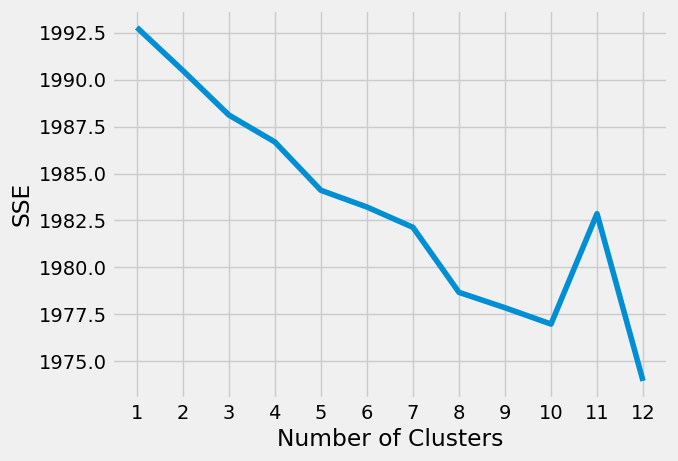

In [88]:
import matplotlib.pyplot as plt
# This line imports the matplotlib library and renames it as plt for ease of use later in the code.

plt.style.use("fivethirtyeight")
# This line sets the style of the plot to "fivethirtyeight", which is a popular style for visualizing data.

plt.plot(range(1, 13), sse)
# This line creates a line plot with range(1, 13) on the x-axis and sse on the y-axis. The sse is typically the sum of squared distances between each data point and its assigned centroid, in the k-means algorithm.

plt.xticks(range(1, 13))
# This line sets the tick marks on the x-axis to the range of values from 1 to 12.

plt.xlabel("Number of Clusters")
# This line sets the label of the x-axis to "Number of Clusters".

plt.ylabel("SSE")
# This line sets the label of the y-axis to "SSE", which stands for sum of squared errors.

plt.show()
# This line displays the plot on the screen. If we don't call this function, the plot will not be displayed.


## To evaluate the K-means algorithm accuracy

We can use a clustering evaluation metric such as the:
- silhouette coefficient or 
- the Calinski-Harabasz index. 

These metrics can help us assess the quality of the clustering results and compare different clusterings.

### - The silhouette coefficient:
Measures the similarity of data points within a cluster compared to other clusters. A higher silhouette coefficient indicates that the clusters are more compact and well-separated. 

### - The Calinski-Harabasz index:
Measures the ratio of between-cluster variance to within-cluster variance. A higher Calinski-Harabasz index indicates that the clusters are more well-defined and distinct from each other.

We can calculate these metrics for different numbers of clusters and choose the number of clusters that gives the highest score.

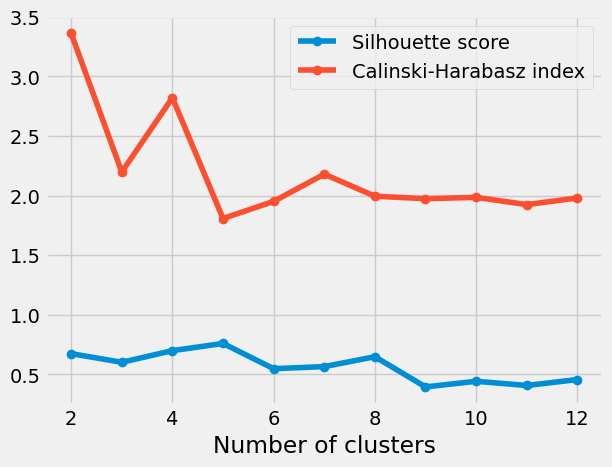

In [96]:
# This code uses Scikit-learn (sklearn) library to perform Mini-Batch K-Means clustering on a set of training data (represented as X_train_vec)
# and evaluate the quality of clustering for different cluster sizes using silhouette score and Calinski-Harabasz index.

from sklearn.metrics import silhouette_score, calinski_harabasz_score
# Imports two evaluation metrics: silhouette_score and calinski_harabasz_score from the sklearn.metrics module.

# define a range of cluster sizes
cluster_sizes = range(2, 13)
# Defines a range of cluster sizes to try.

# create empty lists to store the scores
silhouette_scores = []
ch_scores = []
# Creates two empty lists to store the resulting silhouette scores and Calinski-Harabasz scores.

# loop over the cluster sizes
for n_clusters in cluster_sizes:
# Loops over each value in cluster_sizes.

    # instantiate the Mini-Batch K-Means model
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, init='k-means++', n_init=1,
                             init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
    # Instantiates a Mini-Batch K-Means clustering model with the specified number of clusters (n_clusters), 
    # and other parameters like initialization method, initial batch size, maximum number of iterations, etc.

    
    # fit the model to the data
    kmeans.fit(X_train_vec)
# Fits the K-Means model to the training data X_train_vec.
    
    # compute the cluster assignments and distances
    labels = kmeans.predict(X_train_vec)
    distances = kmeans.transform(X_train_vec)
# Computes the cluster assignments and distances of each data point to its assigned centroid.

    
    # compute the silhouette coefficient and Calinski-Harabasz index
    silhouette = silhouette_score(distances, labels)
    ch = calinski_harabasz_score(X_train_vec.toarray(), labels)
# Computes the silhouette score and the Calinski-Harabasz index using the cluster assignments and distances.

    
    # append the scores to the corresponding lists
    silhouette_scores.append(silhouette)
    ch_scores.append(ch)
# Appends the silhouette score and the Calinski-Harabasz index to their corresponding lists.


# plot the scores as a function of the number of clusters
import matplotlib.pyplot as plt

plt.plot(cluster_sizes, silhouette_scores, 'o-', label='Silhouette score')
plt.plot(cluster_sizes, ch_scores, 'o-', label='Calinski-Harabasz index')
plt.xlabel('Number of clusters')
plt.legend()
plt.show()


# Hierarchical Clustering

Hierarchical clustering is a type of clustering algorithm used in unsupervised machine learning that groups similar data points together. In NLP sentiment analysis, hierarchical clustering can be used to group similar text documents or sentences based on their sentiment, allowing users to easily identify the sentiment expressed in different groups of tweets.

We first load the data and vectorize it using the CountVectorizer class from Scikit-learn. We then calculate pairwise distances between the documents using the cosine similarity metric. Next, we perform hierarchical clustering using the AgglomerativeClustering class with complete linkage and cosine similarity. We then print the cluster assignments for each document and visualize the hierarchical structure as a dendrogram

There are primarily two ways in which hierarchical clustering can be performed:

* Divisive : The algorithm begins with every element in one big generic cluster and then goes on dividing them into specific clusters in a recursive manner.

* Agglomerative : In this case, the algorithm starts by placing every element into a cluster of its own and then goes on merging them into more general clusters in a recursive manner (till they all merge into one big cluster).

We will work with Ward clustering algorithm. Ward clustering is an "Agglomerative Clustering" method, i.e. at each stage, the pair of clusters with minimum between-cluster distance (or wcss) are merged.

To work with "Ward Clustering Algorithm", we perform the following steps:

- Prepare a cosine distance matrix
- Calclate a linkage_matrix
- Plot the hierarchical structure as a dendrogram.

In [79]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

This lines imports the required libraries and modules to perform hierarchical clustering. The ward function from scipy.cluster.hierarchy is used to perform the clustering, while dendrogram is used to plot the resulting dendrogram. The cosine_similarity function from sklearn.metrics.pairwise is used to calculate the cosine similarity between feature vectors.

* Calculate Linkage Matrix using Cosine Similarity

In [80]:
def ward_hierarchical_clustering(feature_matrix):
    
    cosine_distance = 1 - cosine_similarity(vz)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

This is a function that performs hierarchical clustering using the ward method on a given feature matrix. The cosine distance between feature vectors is first calculated using cosine_similarity, and then passed to the ward function to create the linkage matrix. The linkage matrix is returned as output.

* Plot Hierarchical Structure as a Dendrogram

In [81]:
def plot_hierarchical_clusters(linkage_matrix, twitter_data, p=100, figure_size=(8,12)):
# This line defines a function called plot_hierarchical_clusters that takes in a linkage_matrix, 
# a twitter_data dataframe, a p value (default value is 100), and a figure_size tuple (default value is (8,12)).


    # set size
    fig, ax = plt.subplots(figsize=figure_size) 
    # This line creates a new figure object and sets the size of the figure to figure_size. 
    # The returned fig object is a matplotlib figure instance and the ax object is the associated Axes object.
    twitter_text = twitter_data['text'].values.tolist()
    # This line extracts the text column from the twitter_data dataframe and converts it into a list of strings.


    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=twitter_text,
                    truncate_mode='lastp', 
                    p=p,  
                    no_plot=True)
    # This line creates a dendrogram plot using the linkage_matrix and the twitter_text labels. 
    # The orientation parameter specifies that the dendrogram should be oriented vertically, 
    # the truncate_mode parameter specifies that only the last p levels of the dendrogram should be plotted, 
    # and the no_plot parameter specifies that the dendrogram should not be plotted yet. The R variable stores the result of the dendrogram computation.



    temp = {R["leaves"][ii]: twitter_text[ii] for ii in range(len(R["leaves"]))}
    def llf(xx):
        return "{}".format(temp[xx])
    # These lines create a dictionary temp that maps each leaf node index to the corresponding tweet text, 
    # and a function llf that returns the text associated with a given leaf node index.


    ax = dendrogram(
            linkage_matrix,
            truncate_mode='lastp',
            orientation="left",
            p=p,  
            leaf_label_func=llf, 
            leaf_font_size=10.,
            )
    # This line creates the dendrogram plot by calling the dendrogram function again, 
    # this time with the no_plot parameter set to False. The leaf_label_func parameter specifies the function to use for labeling the leaf nodes, 
    # which is the llf function we defined earlier. The leaf_font_size parameter specifies the font size of the leaf labels.
    

    plt.tick_params(axis= 'x',   
                    which='both',  
                    bottom='off',
                    top='off',
                    labelbottom='off')
    # This line removes the x-axis ticks and labels from the plot.


    plt.tight_layout()
    # This line adjusts the spacing of the subplots to prevent overlapping labels.

    plt.savefig('twitter_hierachical_clusters.png', dpi=200)
    # This line saves the dendrogram plot as a PNG image file with a resolution of 200 DPI. 
    # The file name is 'twitter_hierarchical_clusters.png'.

In [82]:
linkage_matrix = ward_hierarchical_clustering(vz)

This line generates a hierarchical clustering model using the Ward method with the input vz, which is typically a document-term matrix or a similar representation of the data. The ward_hierarchical_clustering() function is likely defined somewhere else in the code and uses the scipy library to compute the linkage matrix.

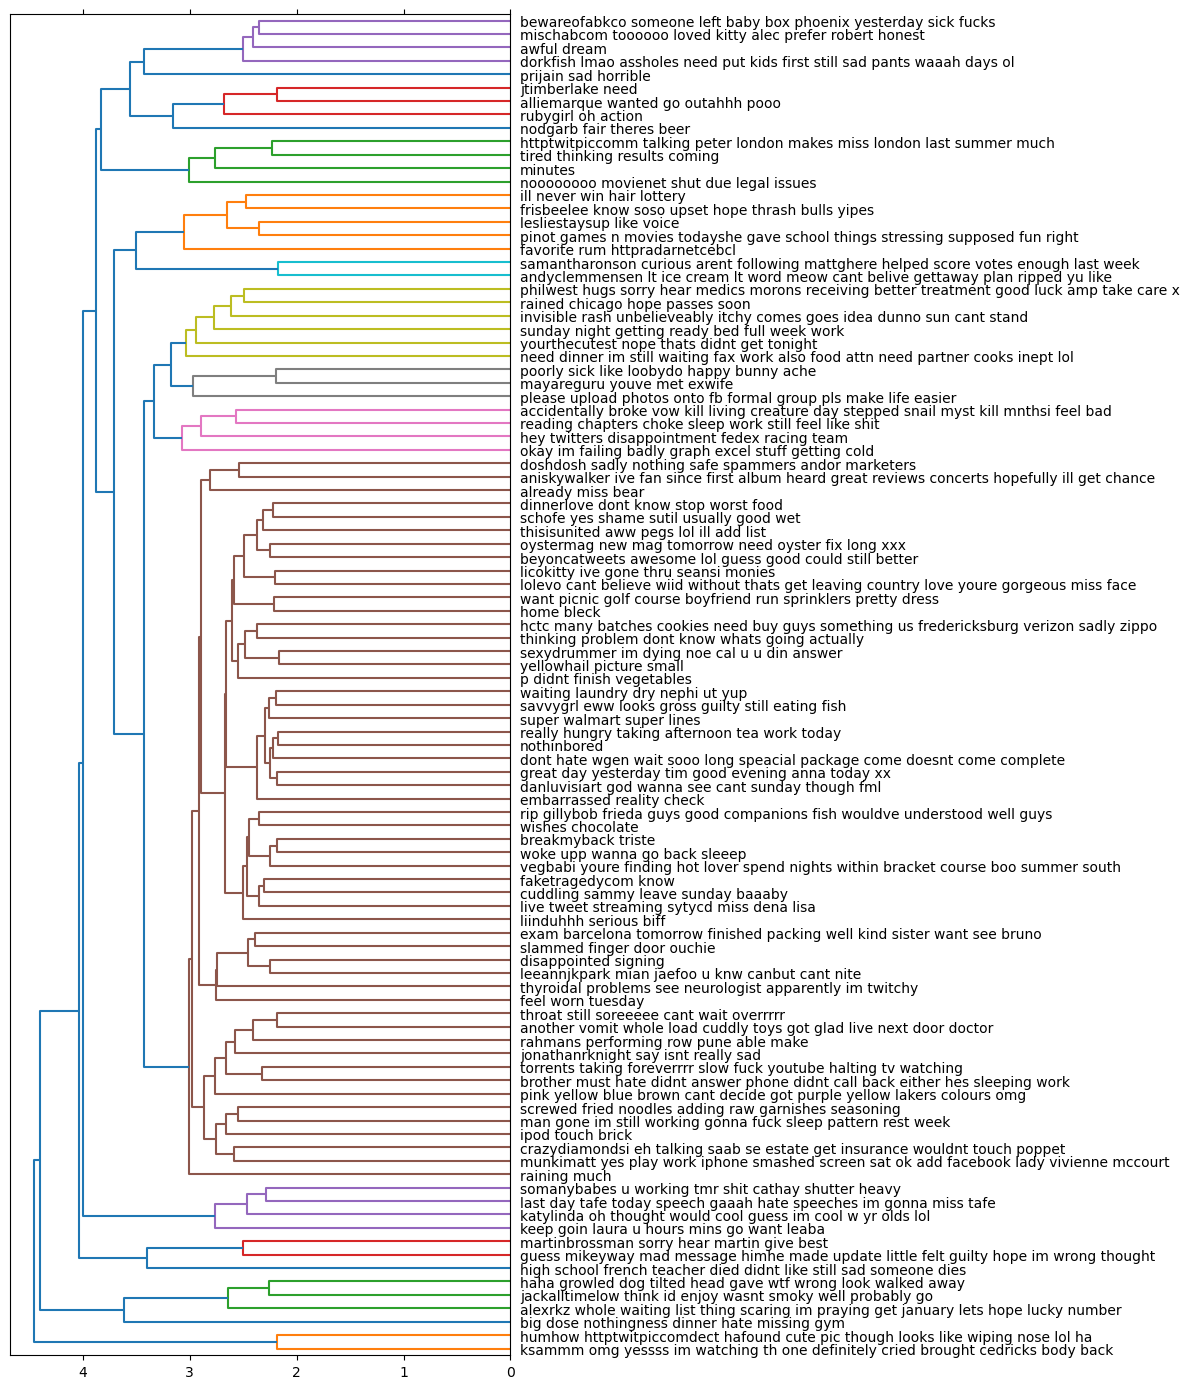

In [83]:
plot_hierarchical_clusters(linkage_matrix,
                           p=100,
                           twitter_data=df,
                           figure_size=(12,14))
# This line calls the plot_hierarchical_clusters() function with several arguments. 
# The linkage_matrix argument is the hierarchical clustering model that was generated in the previous line. 
# The p argument is an integer that specifies the number of leaf nodes to show in the dendrogram plot (the default value is 100). 
# The twitter_data argument is a pandas DataFrame that contains the data to be plotted, which is likely a collection of tweets or similar text data. 
# The figure_size argument is a tuple that specifies the size of the figure in inches (the default value is (8,12)).

This dendrogram is a diagram used to illustrate the hierarchical structure of a clustering algorithm, where the leaves represent the individual data points and the branches represent the clusters formed at each stage of the algorithm. Here's how you can interpret the dendrogram of the Ward clustering algorithm:

- Understanding the axis:

  The vertical axis: represents the distance or dissimilarity between the clusters which is the Euclidean Distance (here 0 to 4). 
  
  The horizontal axis: shows the clusters formed at each stage of the algorithm. The clusters are combined iteratively based on their similarity or distance until all data points are in a single cluster.

- Identifying the clusters:
The dendrogram has branches that split and merge. The height at which a branch splits or merges indicates the level of dissimilarity at which the split or merge occurred. The longer the branch, the greater the dissimilarity between the clusters being merged.

- Determining the optimal number of clusters:
The number of clusters to be formed can be determined by finding the longest vertical distance that does not intersect any horizontal line. The optimal number of clusters is where the corresponding horizontal line intersects the dendrogram.

- Determining cluster membership:
The dendrogram can be cut at any horizontal line to obtain a specific number of clusters. The points below each cut point belong to the same cluster.

In summary, the dendrogram in the Ward clustering algorithm provides a visual representation of the hierarchical structure of the clustering process, showing how individual data points are grouped into clusters based on their similarity or dissimilarity. By interpreting the dendrogram, you can determine the optimal number of clusters and the cluster membership of each data point.

# Affinity Propagation

Affinity Propagation is a clustering algorithm used in natural language processing (NLP) for sentiment analysis which is another unsupervised machine learning algorithm. In contrast to K-means clustering, Affinity Propagation Algorithm does not require the number of clusters to be specified beforehand. Instead, it uses a message-passing algorithm to identify exemplars, or data points that are representative of their clusters. Each data point is assigned a responsibility score and an availability score, which are used to update the exemplars until convergence.

Affinity Propagation is a clustering algorithm used in natural language processing (NLP) for sentiment analysis. Clustering algorithms group similar objects together based on a certain similarity metric. In the case of sentiment analysis, the objects are textual documents or sentences, and the similarity metric is based on the sentiment expressed in the text.

Affinity Propagation is particularly useful for sentiment analysis because it does not require the number of clusters to be predefined, which can be difficult to determine in advance. Instead, it automatically determines the number of clusters by finding the most representative data points, known as exemplars, for each cluster.

The algorithm works by iteratively passing messages between data points until a set of exemplars is identified that best represent the entire data set. These exemplars can then be used to assign new data points to the appropriate cluster.

Overall, Affinity Propagation is a powerful tool for sentiment analysis in NLP because it can automatically identify the most representative data points for each cluster without requiring a priori knowledge of the number of clusters.

In [84]:
from sklearn.metrics.pairwise import cosine_similarity

# This line imports the cosine_similarity function from the sklearn.metrics.
# pairwise module. This function is used to calculate the cosine similarity between two vectors.

from collections import Counter
# This line imports the Counter class from the collections module. 
# The Counter class is used to count the number of occurrences of elements in a list.

cosine_sim_features = cosine_similarity(vz)
# This line calculates the cosine similarity between the rows of vz, which is assumed to be a matrix of features. 
# The resulting cosine_sim_features is a square matrix where cosine_sim_features[i,j] represents the cosine similarity
# between the ith and jth rows of vz.

ap = AffinityPropagation(max_iter=1000)
# This line creates an instance of the AffinityPropagation class from the sklearn.cluster module, 
# with a maximum of 1000 iterations. The AffinityPropagation algorithm is a clustering algorithm 
# that tries to find exemplars, or representative points, in the data and then assigns each data point to its nearest exemplar.

ap.fit(cosine_sim_features)
# This line fits the AffinityPropagation algorithm to the cosine_sim_features matrix, meaning that it clusters the data points 
# based on their cosine similarity values.

res = Counter(ap.labels_)
# This line creates a Counter object from the labels assigned to each data point by the AffinityPropagation algorithm. 
# The labels_ attribute contains the cluster labels for each data point. The Counter object counts the number of occurrences of each cluster label.


res.most_common(13)
# This line returns the 13 most common elements (i.e., cluster labels) in the Counter object, sorted by their frequency. 
# The output is a list of tuples where the first element of each tuple is the cluster label and the second element is the frequency of that label.


[(4, 1965),
 (12, 4),
 (0, 3),
 (1, 3),
 (2, 3),
 (11, 3),
 (3, 3),
 (7, 3),
 (5, 3),
 (9, 3),
 (10, 3),
 (6, 2),
 (8, 2)]

The result of res.most_common(13) is a list of tuples where the first element of each tuple is a cluster label and the second element is the frequency of that label. The list is sorted in descending order by frequency, so the first tuple represents the most common cluster label and its frequency.

In this specific case, the output shows that there are 10 clusters, with the most common cluster label being 4, which appears 1965 times. This means that there are 1965 data points that belong to cluster 4. The second most common cluster label is 12, which appears only 4 times. The remaining clusters (0, 1, 2, 3, 5, 6, 9, and 11) each appear 3 times.

It's worth noting that the number of clusters and their labels will depend on the data and the parameters used in the Affinity Propagation algorithm. The interpretation of the clusters will depend on the context of the problem and the features used to cluster the data.

In [85]:
df['cluster_label'] = ap.labels_
# This line assigns cluster labels to each data point in the dataset df based on the Affinity Propagation algorithm.
# The ap.labels_ attribute contains the cluster labels assigned by the algorithm.

for num_clusters in range(1,13):
# This line starts a loop over the number of clusters to be analyzed, ranging from 1 to 12 (inclusive).

  filtered_clusters = [item[0] for item in res.most_common(num_clusters)]
# This line extracts the num_clusters most common clusters from the Affinity Propagation algorithm's output, which are stored in the ap.labels_ attribute. 
# The most_common method of the collections module is used to find the most common clusters.

  filtered_df = df[df['cluster_label'].isin(filtered_clusters)]
# This line creates a new dataframe filtered_df containing only the rows from df that belong to the clusters selected in the previous step.

  twitter_clusters = (filtered_df[['text', 'cluster_label']]
                    .sort_values(by=['cluster_label'], 
                                ascending=False)
                                .groupby('cluster_label').head(20))
# This line sorts the filtered_df dataframe by cluster label in descending order, groups the data by cluster label, 
# and selects the top 20 items in each group (i.e., the 20 most representative tweets for each cluster).

  twitter_clusters = twitter_clusters.copy(deep=True)
# This line creates a copy of the twitter_clusters dataframe to avoid modifying the original dataframe.


  # get key features for each cluster
  # get twetts belonging to each cluster
  for cluster_num in range(len(filtered_clusters)):
# This line starts a loop over the selected clusters.

      twitts = twitter_clusters[twitter_clusters['cluster_label'] == filtered_clusters[cluster_num]]['text'].values.tolist()
# This line extracts the tweets belonging to the current cluster from the twitter_clusters dataframe and stores them as a list in the twitts variable.

      print('CLUSTER '+str(cluster_num)+':')
# This line prints the label of the current cluster.

      print('Some similar twitts:', twitts)
# This line prints some example tweets from the current cluster.

      print('-'*50)
# This line prints a line of dashes to separate the output for different clusters.

  print('='*100)
# the syntax print('='*100) is used to print a string of 100 equal signs (=) to the console.
# The * operator is used to repeat the character on its left-hand side a certain number of times, which in this case is 100. So, = is repeated 100 times to create a string of 100 equal signs.
# This line of code is commonly used to create a visual separator or divider between different sections of output in the console, making it easier to read and understand the output.


CLUSTER 0:
Some similar twitts: ['ksammm omg yessss im watching th one definitely cried brought cedricks body back', 'summer cleaning computer removedgb', 'im listening greenday sorry im actually goin lol', 'zaxonate kaathaala romba bore adichathu athan hws hot hot weekend', 'nemoniknemonik time', 'beckyfearns hahaha okay hopeee loooose oh pre orderd new jb album burnin book rolling stone posterr x', 'finethere many movies anticipateespecially quotharry potter quotcause thats shown birthmonthwooot', 'erethfamily hehe theres always someone celebrating somthing family', 'ddlovato hey demi say hi pleasejust hi day colorfull yesterday', 'donniewahlberg thanks much reminding live life kinda stagnant till came back thank xx', 'way home movie anyone coming', 'andrewmoriarty tweet made laugh much', 'buildingwalls ive change thrown times sq riding bike tend avoid area days', 'angesbiz mothers day chillaxed', 'favorite party last night getting attention guys sat watched', 'geeksyndicate posted r